In [1]:
pip install pandas


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("data.csv")

df.head()

,Num_equipement,Systeme,Description,Date de détéction de l'anomalie,Description de l'équipement,Section propriétaire,Fiabilité Intégrité,Disponibilté,Process Safety,Criticité
0,3f68d058-b105-46f0-b137-6ce7695b85d1,e4f67f5f-be46-4ce0-ad14-68575d3cf0cd,SAFETY : Fuite par bride radiateur du transfo...,2024-04-14 08:55:38,TRANSFO PRINCIPAL,34EL,5,5,5,15
1,3f68d058-b105-46f0-b137-6ce7695b85d1,e4f67f5f-be46-4ce0-ad14-68575d3cf0cd,SAFETY : Fuite par bride radiateur du transfo...,2024-04-14 08:55:38,TRANSFO PRINCIPAL,34EL,5,5,5,15
2,3f68d058-b105-46f0-b137-6ce7695b85d1,e4f67f5f-be46-4ce0-ad14-68575d3cf0cd,apparition alarme 30bat10cf001 ( transfo princ...,2023-08-29 11:13:49,TRANSFO PRINCIPAL,34EL,5,5,3,13
3,c623e928-a195-4fea-9cc1-791e5e1f7988,52b20517-a1ba-4b78-8711-adebd336a6c2,SAFETY : Présence des trace d'huile au niveau ...,2024-09-16 08:58:08,Niveaustat coté Boite à Borne Alternateur,34EL,3,5,5,13
4,7796ae6e-1bd3-499c-b920-7288f26e4f9a,52b20517-a1ba-4b78-8711-adebd336a6c2,SAFETY : dysfonctionnement de la résistance de...,2025-01-05 08:21:08,GROUPES ELECTROGENES U3,34EL,3,5,5,13


In [2]:
df.size

63440

In [3]:
np.where(pd.isnull(df))
df.size

63440

In [12]:
remove_unused = df.drop(["Date de détéction de l'anomalie", "Num_equipement"], axis=1)
dup = remove_unused.dropna()
dup

,Systeme,Description,Description de l'équipement,Section propriétaire,Fiabilité Intégrité,Disponibilté,Process Safety,Criticité
0,e4f67f5f-be46-4ce0-ad14-68575d3cf0cd,SAFETY : Fuite par bride radiateur du transfo...,TRANSFO PRINCIPAL,34EL,5,5,5,15
1,e4f67f5f-be46-4ce0-ad14-68575d3cf0cd,SAFETY : Fuite par bride radiateur du transfo...,TRANSFO PRINCIPAL,34EL,5,5,5,15
2,e4f67f5f-be46-4ce0-ad14-68575d3cf0cd,apparition alarme 30bat10cf001 ( transfo princ...,TRANSFO PRINCIPAL,34EL,5,5,3,13
3,52b20517-a1ba-4b78-8711-adebd336a6c2,SAFETY : Présence des trace d'huile au niveau ...,Niveaustat coté Boite à Borne Alternateur,34EL,3,5,5,13
4,52b20517-a1ba-4b78-8711-adebd336a6c2,SAFETY : dysfonctionnement de la résistance de...,GROUPES ELECTROGENES U3,34EL,3,5,5,13
...,...,...,...,...,...,...,...,...
6339,f7edce60-d1a5-401a-b673-f1193930615c,Discordance du vanne entrées sas du champ d'év...,SERVOMOTEUR DE LA VANNE DE REMPLISSAGE SAS A ...,34CT,1,1,1,3
6340,8ab799f5-144f-420c-b426-3d7e36b13f59,le ramoneur IR41 est désaccouplé,RAMONEUR N°41 D'EFFACEMENT TYPE IR,34MC,1,1,1,3
6341,e96ee01c-6d13-480b-a5bc-2c49bb05c70e,Prévoir un appoint d'huile au niveau de la pom...,POMPE D'APPOINT N°1 (EAU DÉMINÉRALISÉE),34MM,1,1,1,3
6342,e96ee01c-6d13-480b-a5bc-2c49bb05c70e,Demande l'appoint d'huile au niveau de pompe G...,POMPE D'APPOINT N°1 (EAU DÉMINÉRALISÉE),34MM,1,1,1,3


In [6]:
pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
sample = [df["Description"][0], df["Description de l'équipement"][0]]


tfidf = TfidfVectorizer(max_features=50)
encoded = tfidf.fit_transform(sample)

print(sample)

print('\nidf values:')
for ele1, ele2 in zip(tfidf.get_feature_names_out(), tfidf.idf_):
    print(ele1, ':', ele2)

['SAFETY : Fuite par bride\xa0 radiateur du transformateur principal', 'TRANSFO PRINCIPAL']

idf values:
bride : 1.4054651081081644
du : 1.4054651081081644
fuite : 1.4054651081081644
par : 1.4054651081081644
principal : 1.0
radiateur : 1.4054651081081644
safety : 1.4054651081081644
transfo : 1.4054651081081644
transformateur : 1.4054651081081644


In [9]:
pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install seaborn


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


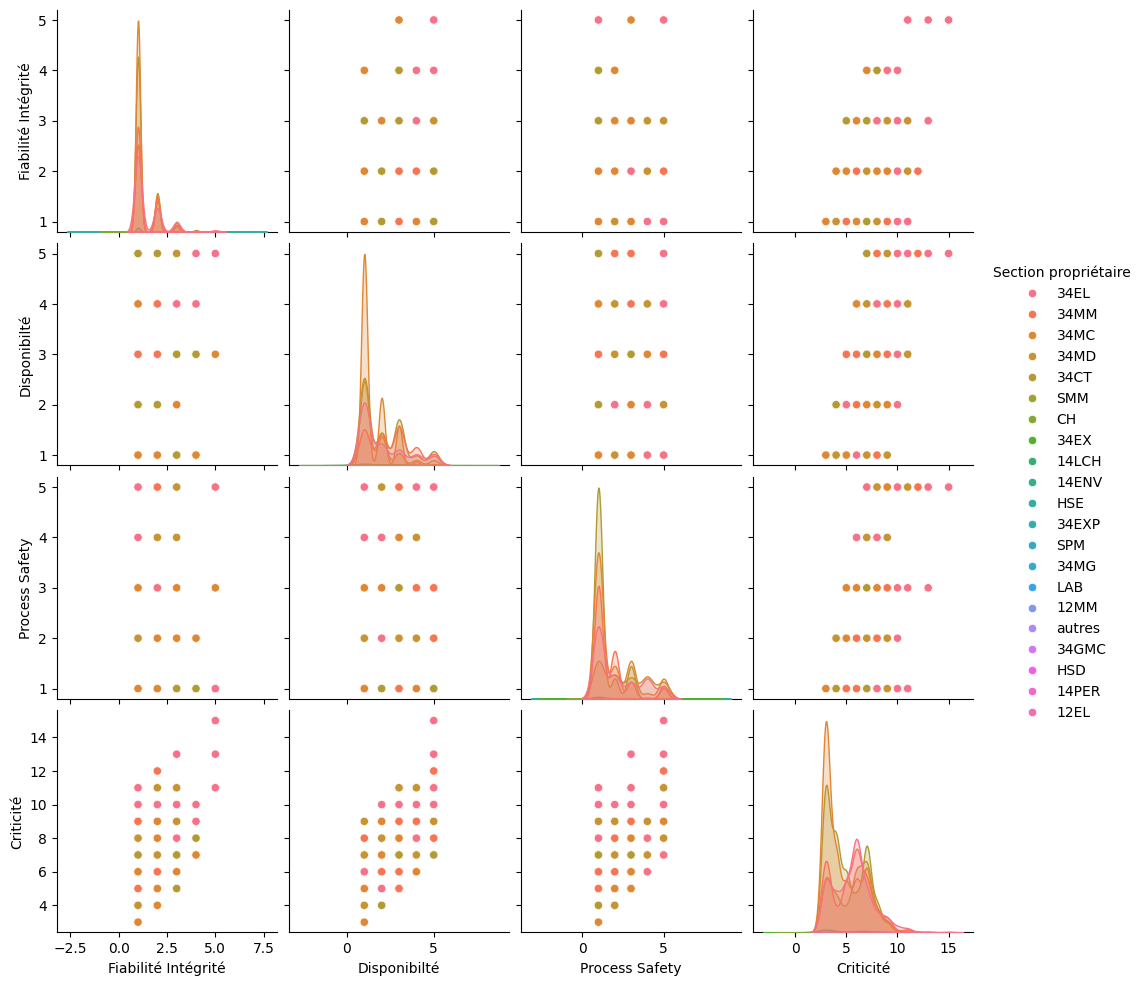

In [11]:
sns.pairplot(dup, hue='Section propriétaire')

In [15]:
df_by_section = dup.groupby("Section propriétaire")
df_by_section.describe().head()

Fiabilité Intégrité                                      \
                                   count      mean       std  min   25%  50%   
Section propriétaire                                                           
12EL                                 1.0  1.000000       NaN  1.0  1.00  1.0   
12MM                                 1.0  1.000000       NaN  1.0  1.00  1.0   
14ENV                                6.0  1.666667  0.516398  1.0  1.25  2.0   
14LCH                               10.0  1.500000  0.849837  1.0  1.00  1.0   
14PER                                1.0  1.000000       NaN  1.0  1.00  1.0   

                                Disponibilté       ... Process Safety       \
                       75%  max        count mean  ...            75%  max   
Section propriétaire                               ...                       
12EL                  1.00  1.0          1.0  1.0  ...           1.00  1.0   
12MM                  1.00  1.0          1.0  5.0  ...           1.00  1.0   
14ENV                 2.00  2.0          6.0  1.5  ...           3.75  5.0   
14LCH                 1.75  3.0         10.0  2.3  ...           3.00  5.0   
14PER                 1.00  1.0          1.0  1.0  ...           1.00  1.0   

                     Criticité                                               
                         count      mean       std  min  25%  50%  75%  max  
Section propriétaire                                                         
12EL                       1.0  3.000000       NaN  3.0  3.0  3.0  3.0  3.0  
12MM                       1.0  7.000000       NaN  7.0  7.0  7.0  7.0  7.0  
14ENV                      6.0  6.666667  1.032796  6.0  6.0  6.0  7.5  8.0  
14LCH                     10.0  6.800000  0.918937  6.0  6.0  7.0  7.0  9.0  
14PER                      1.0  3.000000       NaN  3.0  3.0  3.0  3.0  3.0  

[5 rows x 32 columns]

In [16]:
dup.head()

,Systeme,Description,Description de l'équipement,Section propriétaire,Fiabilité Intégrité,Disponibilté,Process Safety,Criticité
0,e4f67f5f-be46-4ce0-ad14-68575d3cf0cd,SAFETY : Fuite par bride radiateur du transfo...,TRANSFO PRINCIPAL,34EL,5,5,5,15
1,e4f67f5f-be46-4ce0-ad14-68575d3cf0cd,SAFETY : Fuite par bride radiateur du transfo...,TRANSFO PRINCIPAL,34EL,5,5,5,15
2,e4f67f5f-be46-4ce0-ad14-68575d3cf0cd,apparition alarme 30bat10cf001 ( transfo princ...,TRANSFO PRINCIPAL,34EL,5,5,3,13
3,52b20517-a1ba-4b78-8711-adebd336a6c2,SAFETY : Présence des trace d'huile au niveau ...,Niveaustat coté Boite à Borne Alternateur,34EL,3,5,5,13
4,52b20517-a1ba-4b78-8711-adebd336a6c2,SAFETY : dysfonctionnement de la résistance de...,GROUPES ELECTROGENES U3,34EL,3,5,5,13


In [13]:
pip install nltk unidecode


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [17]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from unidecode import unidecode
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

dup.head()

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/khairallahmohammed/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/khairallahmohammed/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/khairallahmohammed/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,Systeme,Description,Description de l'équipement,Section propriétaire,Fiabilité Intégrité,Disponibilté,Process Safety,Criticité
0,e4f67f5f-be46-4ce0-ad14-68575d3cf0cd,SAFETY : Fuite par bride radiateur du transfo...,TRANSFO PRINCIPAL,34EL,5,5,5,15
1,e4f67f5f-be46-4ce0-ad14-68575d3cf0cd,SAFETY : Fuite par bride radiateur du transfo...,TRANSFO PRINCIPAL,34EL,5,5,5,15
2,e4f67f5f-be46-4ce0-ad14-68575d3cf0cd,apparition alarme 30bat10cf001 ( transfo princ...,TRANSFO PRINCIPAL,34EL,5,5,3,13
3,52b20517-a1ba-4b78-8711-adebd336a6c2,SAFETY : Présence des trace d'huile au niveau ...,Niveaustat coté Boite à Borne Alternateur,34EL,3,5,5,13
4,52b20517-a1ba-4b78-8711-adebd336a6c2,SAFETY : dysfonctionnement de la résistance de...,GROUPES ELECTROGENES U3,34EL,3,5,5,13


In [18]:
import re

def preprocess_column_name(col):
    col = col.lower()
    col = unidecode(col) 
    col = re.sub(r'[^\w\s]', '', col)
    col = re.sub(r'\s+', '_', col.strip())
    return col

dup.columns = [preprocess_column_name(col) for col in dup.columns]

dup.head()

,systeme,description,description_de_lequipement,section_proprietaire,fiabilite_integrite,disponibilte,process_safety,criticite
0,e4f67f5f-be46-4ce0-ad14-68575d3cf0cd,SAFETY : Fuite par bride radiateur du transfo...,TRANSFO PRINCIPAL,34EL,5,5,5,15
1,e4f67f5f-be46-4ce0-ad14-68575d3cf0cd,SAFETY : Fuite par bride radiateur du transfo...,TRANSFO PRINCIPAL,34EL,5,5,5,15
2,e4f67f5f-be46-4ce0-ad14-68575d3cf0cd,apparition alarme 30bat10cf001 ( transfo princ...,TRANSFO PRINCIPAL,34EL,5,5,3,13
3,52b20517-a1ba-4b78-8711-adebd336a6c2,SAFETY : Présence des trace d'huile au niveau ...,Niveaustat coté Boite à Borne Alternateur,34EL,3,5,5,13
4,52b20517-a1ba-4b78-8711-adebd336a6c2,SAFETY : dysfonctionnement de la résistance de...,GROUPES ELECTROGENES U3,34EL,3,5,5,13


In [19]:
dup

,systeme,description,description_de_lequipement,section_proprietaire,fiabilite_integrite,disponibilte,process_safety,criticite
0,e4f67f5f-be46-4ce0-ad14-68575d3cf0cd,SAFETY : Fuite par bride radiateur du transfo...,TRANSFO PRINCIPAL,34EL,5,5,5,15
1,e4f67f5f-be46-4ce0-ad14-68575d3cf0cd,SAFETY : Fuite par bride radiateur du transfo...,TRANSFO PRINCIPAL,34EL,5,5,5,15
2,e4f67f5f-be46-4ce0-ad14-68575d3cf0cd,apparition alarme 30bat10cf001 ( transfo princ...,TRANSFO PRINCIPAL,34EL,5,5,3,13
3,52b20517-a1ba-4b78-8711-adebd336a6c2,SAFETY : Présence des trace d'huile au niveau ...,Niveaustat coté Boite à Borne Alternateur,34EL,3,5,5,13
4,52b20517-a1ba-4b78-8711-adebd336a6c2,SAFETY : dysfonctionnement de la résistance de...,GROUPES ELECTROGENES U3,34EL,3,5,5,13
...,...,...,...,...,...,...,...,...
6339,f7edce60-d1a5-401a-b673-f1193930615c,Discordance du vanne entrées sas du champ d'év...,SERVOMOTEUR DE LA VANNE DE REMPLISSAGE SAS A ...,34CT,1,1,1,3
6340,8ab799f5-144f-420c-b426-3d7e36b13f59,le ramoneur IR41 est désaccouplé,RAMONEUR N°41 D'EFFACEMENT TYPE IR,34MC,1,1,1,3
6341,e96ee01c-6d13-480b-a5bc-2c49bb05c70e,Prévoir un appoint d'huile au niveau de la pom...,POMPE D'APPOINT N°1 (EAU DÉMINÉRALISÉE),34MM,1,1,1,3
6342,e96ee01c-6d13-480b-a5bc-2c49bb05c70e,Demande l'appoint d'huile au niveau de pompe G...,POMPE D'APPOINT N°1 (EAU DÉMINÉRALISÉE),34MM,1,1,1,3


In [22]:
french_stopwords = set(stopwords.words('french'))

def preprocess_french(text):
    if pd.isna(text):
        return ""
    
    text = unidecode(text.lower()) 
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text, language='french')
    tokens = [t for t in tokens if t not in french_stopwords and len(t) > 1 and not t.isdigit()]
    return ' '.join(tokens)

dup.loc[:, 'clean_description'] = dup['description'].apply(preprocess_french)
dup.loc[:, 'clean_description_equipment'] = dup['description_de_lequipement'].apply(preprocess_french)

dup = dup.drop(["description","description_de_lequipement"], axis=1)
dup.head()

,systeme,section_proprietaire,fiabilite_integrite,disponibilte,process_safety,criticite,clean_description,clean_description_equipment
0,e4f67f5f-be46-4ce0-ad14-68575d3cf0cd,34EL,5,5,5,15,safety fuite bride radiateur transformateur pr...,transfo principal
1,e4f67f5f-be46-4ce0-ad14-68575d3cf0cd,34EL,5,5,5,15,safety fuite bride radiateur transformateur pr...,transfo principal
2,e4f67f5f-be46-4ce0-ad14-68575d3cf0cd,34EL,5,5,3,13,apparition alarme 30bat10cf001 transfo princip...,transfo principal
3,52b20517-a1ba-4b78-8711-adebd336a6c2,34EL,3,5,5,13,safety presence trace dhuile niveau detecteur ...,niveaustat cote boite borne alternateur
4,52b20517-a1ba-4b78-8711-adebd336a6c2,34EL,3,5,5,13,safety dysfonctionnement resistance conditionn...,groupes electrogenes u3


In [23]:
from sklearn.preprocessing import OneHotEncoder

category_transformer = OneHotEncoder(handle_unknown="ignore")

In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

french_stopwords = stopwords.words('french')

text_transformer = TfidfVectorizer(max_features=1000, stop_words=french_stopwords, lowercase=True)

In [25]:
text_transformer.fit_transform(dup["clean_description"])

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 38580 stored elements and shape (6342, 1000)>

In [27]:
category_transformer.fit_transform(dup[["clean_description_equipment","systeme"]])

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 12684 stored elements and shape (6342, 1073)>

In [28]:
dup.columns

Index(['systeme', 'section_proprietaire', 'fiabilite_integrite',
       'disponibilte', 'process_safety', 'criticite', 'clean_description',
       'clean_description_equipment'],
      dtype='object')

In [77]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", category_transformer, ["clean_description_equipment", "systeme"]),
        ("txt", text_transformer, "clean_description")
    ]
)

X = dup[["clean_description","clean_description_equipment","systeme"]]
y = dup[["disponibilte","process_safety","fiabilite_integrite"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [78]:
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import cross_val_score, KFold

model = MultiOutputRegressor(XGBRegressor(n_estimators=1000, random_state=42, max_depth=3, learning_rate=0.1, eval_metric='mae', verbosity=0))

pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", model)
])

kf = KFold(n_splits=10, shuffle=True, random_state=42)

scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=kf, n_jobs=-1)

mae_scores = -scores

print("MAE scores for each fold:", mae_scores)
print("Average MAE:", np.mean(mae_scores))
print("Standard deviation:", np.std(mae_scores))


MAE scores for each fold: [0.3275328  0.32789037 0.32765928 0.3131786  0.31649438 0.30260307
 0.33880398 0.3410621  0.32069084 0.33056906]
Average MAE: 0.32464844584465025
Standard deviation: 0.011101545088606439


MAE scores for each fold: [0.44416812 0.43162072 0.42539501 0.45920491 0.44109952]
Average MAE: 0.44029765725135805
Standard deviation: 0.011580033649650094

In [79]:
X_train.head()

,clean_description,clean_description_equipment,systeme
1700,bruit anormal gaine air total entree broyeur,broyeur,c111ab6f-a961-43ce-b8fe-54b2abf73628
57,safety fuite presseetoupe niveau vanne tor des...,shspray water block,e87a6eed-5b9b-41f6-9d11-a3214c05bd53
3590,defaut position inclinaison coin rapport autre...,commande inclinaison bruleurs coin,d3e617aa-b5b2-49db-8ba0-c09d4d2083b9
3039,fuite cendres rechauffeur dair cote terre deca...,rechauffeur dair,b19afa19-b87f-43d7-b83e-d3c8a4d4f967
6301,prevoir appoint dhuile niveau pompe eau demine...,pompe dappoint eau demineralisee,e96ee01c-6d13-480b-a5bc-2c49bb05c70e


In [81]:
y_train.head()

,disponibilte,process_safety,fiabilite_integrite
1700,3,2,2
57,4,5,1
3590,3,1,1
3039,1,3,1
6301,1,1,1


In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

y_pred_df = pd.DataFrame(
    y_pred,
    columns=["pred_Disponibilité", "pred_Process Safety", "pred_Fiabilité Intégrité"]
)

print(y_pred_df.head())

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE : {mae:.4f}")
print(f"MSE : {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²   : {r2:.4f}")

   pred_Disponibilité  pred_Process Safety  pred_Fiabilité Intégrité
0            2.947911             2.560030                  1.056356
1            0.985277             2.508730                  1.498511
2            1.013972             1.515632                  1.292956
3            1.214830             1.294971                  0.989161
4            4.328349             1.294061                  2.839771
MAE : 0.3266
MSE : 0.2905
RMSE: 0.5390
R²   : 0.7161


In [83]:
single_sample = X.iloc[[0]]
single_sample

,clean_description,clean_description_equipment,systeme
0,safety fuite bride radiateur transformateur pr...,transfo principal,e4f67f5f-be46-4ce0-ad14-68575d3cf0cd


In [84]:
pred = pipeline.predict(single_sample)

print(single_sample)

print(f"Predicted values:\nDisponibilité: {pred[0][0]:.2f}, Safety: {pred[0][1]:.2f}, Integrity: {pred[0][2]:.2f}")


                                   clean_description  \
0  safety fuite bride radiateur transformateur pr...   

  clean_description_equipment                               systeme  
0           transfo principal  e4f67f5f-be46-4ce0-ad14-68575d3cf0cd  
Predicted values:
Disponibilité: 4.68, Safety: 4.88, Integrity: 4.44


In [62]:
pip install joblib


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [85]:
import joblib

joblib.dump(pipeline, "xgb_multioutput_pipeline.pkl")

['xgb_multioutput_pipeline.pkl']

In [87]:
import joblib

loaded_pipeline = joblib.load("xgb_multioutput_pipeline.pkl")

data = pd.DataFrame({
    "clean_description": [
        "fuite huile",
    ],
    "clean_description_equipment": [
        "transfo principal"
    ],
    "systeme": [
        "e4f67f5f-be46-4ce0-ad14-68575d3cf0cd"
    ],
})

data.loc[:, 'clean_description'] = data['clean_description'].apply(preprocess_french)
data.loc[:, 'clean_escription_equipment'] = data['clean_description_equipment'].apply(preprocess_french)

data.head()

prediction = loaded_pipeline.predict(data)
# predictions

print("Predicted Disponibilité:", prediction[0][0])
print("Predicted Safety:", prediction[0][1])
print("Predicted Intégrité:", prediction[0][2])
print("Predicted Criticite:", prediction[0][0] + prediction[0][1] + prediction[0][2])

Predicted Disponibilité: 3.728066
Predicted Safety: 1.8736174
Predicted Intégrité: 1.7857587
Predicted Criticite: 7.3874426


In [90]:
pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.7/252.7 MB 6.4 MB/s eta 0:00:000m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 25.5 MB/s eta 0:00:000:00:01 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 27.5 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 8.6 MB/s eta 0:00:00m eta 0:00:010:01:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 418.1/418.1 kB 9.4 MB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 22.7 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━

In [44]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split, KFold
from scipy.sparse import csr_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("="*60)
print("ANN MODEL WITH K-FOLD CROSS-VALIDATION")
print("="*60)

# Function to create ANN model
def create_ann_model(input_shape):
    model = Sequential([
        Dense(256, activation='relu', input_shape=(input_shape,)),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dense(3, activation='linear')  # 3 outputs: disponibilité, safety, intégrité
    ])
    model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae'])
    return model

# Prepare data for K-Fold validation
X_processed = preprocessor.fit_transform(X)
if isinstance(X_processed, csr_matrix):
    X_processed = X_processed.toarray()

y_processed = np.array(y).astype(np.float32)

print(f"Total data shape: X={X_processed.shape}, y={y_processed.shape}")

# K-Fold Cross Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
fold_scores = []
fold_histories = []

print(f"\nStarting {kf.n_splits}-Fold Cross Validation...")

for fold, (train_idx, val_idx) in enumerate(kf.split(X_processed)):
    print(f"\n--- Fold {fold + 1}/{kf.n_splits} ---")
    
    # Split data for this fold
    X_train_fold = X_processed[train_idx]
    X_val_fold = X_processed[val_idx]
    y_train_fold = y_processed[train_idx]
    y_val_fold = y_processed[val_idx]
    
    print(f"Train size: {X_train_fold.shape[0]}, Validation size: {X_val_fold.shape[0]}")
    
    # Create and train model for this fold
    model_fold = create_ann_model(X_processed.shape[1])
    
    # Early stopping
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=0)
    
    # Train the model
    history = model_fold.fit(
        X_train_fold, y_train_fold,
        validation_data=(X_val_fold, y_val_fold),
        epochs=50,
        batch_size=32,
        callbacks=[early_stop],
        verbose=0  # Set to 1 if you want to see training progress for each fold
    )
    
    # Evaluate on validation set
    val_loss, val_mae = model_fold.evaluate(X_val_fold, y_val_fold, verbose=0)
    fold_scores.append(val_mae)
    fold_histories.append(history)
    
    print(f"Fold {fold + 1} - Validation MAE: {val_mae:.4f}")

# Calculate cross-validation results
fold_scores = np.array(fold_scores)
print(f"\n" + "="*60)
print("K-FOLD CROSS-VALIDATION RESULTS")
print("="*60)
print(f"MAE scores for each fold: {fold_scores}")
print(f"Average MAE: {np.mean(fold_scores):.4f}")
print(f"Standard deviation: {np.std(fold_scores):.4f}")
print(f"95% Confidence Interval: {np.mean(fold_scores):.4f} ± {1.96 * np.std(fold_scores):.4f}")

# Train final model on all data for comparison and saving
print(f"\n" + "="*60)
print("TRAINING FINAL MODEL ON FULL DATASET")
print("="*60)

# Split data for final evaluation (same split as XGBoost for fair comparison)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform data using the same preprocessor
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

if isinstance(X_train_processed, csr_matrix):
    X_train_processed = X_train_processed.toarray()
    X_test_processed = X_test_processed.toarray()

y_train = np.array(y_train).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

print(f"Final training - X_train: {X_train_processed.shape}, X_test: {X_test_processed.shape}")

# Create and train final model
final_model = create_ann_model(X_train_processed.shape[1])
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

print("Training final model...")
history = final_model.fit(
    X_train_processed, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate final model
loss, mae = final_model.evaluate(X_test_processed, y_test, verbose=1)
print(f"Final Model Test MAE: {mae:.4f}")

# Make predictions for comparison
y_pred_ann = final_model.predict(X_test_processed)

# Calculate detailed metrics
mae_ann = mean_absolute_error(y_test, y_pred_ann)
mse_ann = mean_squared_error(y_test, y_pred_ann)
rmse_ann = np.sqrt(mse_ann)
r2_ann = r2_score(y_test, y_pred_ann)

print(f"\n" + "="*60)
print("FINAL ANN MODEL RESULTS")
print("="*60)
print(f"Cross-Validation MAE: {np.mean(fold_scores):.4f} ± {np.std(fold_scores):.4f}")
print(f"Test Set MAE: {mae_ann:.4f}")
print(f"Test Set MSE: {mse_ann:.4f}")
print(f"Test Set RMSE: {rmse_ann:.4f}")
print(f"Test Set R²: {r2_ann:.4f}")

# Save the final model
final_model.save('ann_model_kfold.h5')
print(f"\nFinal model saved as 'ann_model_kfold.h5'")

# Store variables for comparison in next cells
model = final_model  # Keep this for compatibility with comparison cells


ANN MODEL WITH K-FOLD CROSS-VALIDATION
Total data shape: X=(6342, 2073), y=(6342, 3)

Starting 10-Fold Cross Validation...

--- Fold 1/10 ---
Train size: 5707, Validation size: 635


/Users/khairallahmohammed/Documents/taqathon-model/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 1 - Validation MAE: 0.2089

--- Fold 2/10 ---
Train size: 5707, Validation size: 635
Fold 2 - Validation MAE: 0.1965

--- Fold 3/10 ---
Train size: 5708, Validation size: 634
Fold 3 - Validation MAE: 0.2025

--- Fold 4/10 ---
Train size: 5708, Validation size: 634
Fold 4 - Validation MAE: 0.2258

--- Fold 5/10 ---
Train size: 5708, Validation size: 634
Fold 5 - Validation MAE: 0.2083

--- Fold 6/10 ---
Train size: 5708, Validation size: 634
Fold 6 - Validation MAE: 0.1789

--- Fold 7/10 ---
Train size: 5708, Validation size: 634
Fold 7 - Validation MAE: 0.2140

--- Fold 8/10 ---
Train size: 5708, Validation size: 634
Fold 8 - Validation MAE: 0.2261

--- Fold 9/10 ---
Train size: 5708, Validation size: 634
Fold 9 - Validation MAE: 0.1937

--- Fold 10/10 ---
Train size: 5708, Validation size: 634
Fold 10 - Validation MAE: 0.2081

K-FOLD CROSS-VALIDATION RESULTS
MAE scores for each fold: [0.20889086 0.19646813 0.20249188 0.22580074 0.20825736 0.17892377
 0.21399297 0.22609068 0.19366

/Users/khairallahmohammed/Documents/taqathon-model/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


127/127 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0474 - mae: 1.0474 - val_loss: 0.4935 - val_mae: 0.4935
Epoch 2/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4886 - mae: 0.4886 - val_loss: 0.3997 - val_mae: 0.3997
Epoch 3/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3828 - mae: 0.3828 - val_loss: 0.3647 - val_mae: 0.3647
Epoch 4/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3376 - mae: 0.3376 - val_loss: 0.3564 - val_mae: 0.3564
Epoch 5/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3060 - mae: 0.3060 - val_loss: 0.3427 - val_mae: 0.3427
Epoch 6/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2853 - mae: 0.2853 - val_loss: 0.3299 - val_mae: 0.3299
Epoch 7/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2617 - mae: 0.2617 - val_loss: 0.3212 - val_mae: 0.3212
Epoch 8/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2460 - mae: 0.2460 - val_loss: 0.3237 - val_mae: 0.3237
Epoch 9/50
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2285 


FINAL ANN MODEL RESULTS
Cross-Validation MAE: 0.2063 ± 0.0137
Test Set MAE: 0.2620
Test Set MSE: 0.3142
Test Set RMSE: 0.5605
Test Set R²: 0.7055

Final model saved as 'ann_model_kfold.h5'


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Get XGBoost predictions (using the same test set)
y_pred_xgb = pipeline.predict(X_test)

# We already have ANN predictions from the previous cell
# y_pred_ann was created in the previous cell

print("="*60)
print("MODEL COMPARISON: XGBoost vs ANN")
print("="*60)

# Calculate metrics for both models
def calculate_metrics(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n{model_name} Results:")
    print(f"MAE  : {mae:.4f}")
    print(f"MSE  : {mse:.4f}")
    print(f"RMSE : {rmse:.4f}")
    print(f"R²   : {r2:.4f}")
    
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R²': r2}

# Calculate metrics for both models
xgb_metrics = calculate_metrics(y_test, y_pred_xgb, "XGBoost")
ann_metrics = calculate_metrics(y_test, y_pred_ann, "ANN")

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'XGBoost': [xgb_metrics['MAE'], xgb_metrics['MSE'], xgb_metrics['RMSE'], xgb_metrics['R²']],
    'ANN': [ann_metrics['MAE'], ann_metrics['MSE'], ann_metrics['RMSE'], ann_metrics['R²']]
}, index=['MAE', 'MSE', 'RMSE', 'R²'])

print("\n" + "="*60)
print("METRICS COMPARISON TABLE")
print("="*60)
print(comparison_df.round(4))

# Determine which model is better for each metric
print("\n" + "="*60)
print("WINNER BY METRIC (Lower is better for MAE, MSE, RMSE; Higher is better for R²)")
print("="*60)
for metric in ['MAE', 'MSE', 'RMSE']:
    winner = 'XGBoost' if comparison_df.loc[metric, 'XGBoost'] < comparison_df.loc[metric, 'ANN'] else 'ANN'
    print(f"{metric:4}: {winner}")

# For R², higher is better
winner_r2 = 'XGBoost' if comparison_df.loc['R²', 'XGBoost'] > comparison_df.loc['R²', 'ANN'] else 'ANN'
print(f"R²  : {winner_r2}")

# Calculate percentage improvements
print("\n" + "="*60)
print("PERCENTAGE DIFFERENCES (Positive means XGBoost is better)")
print("="*60)
for metric in comparison_df.index:
    if metric == 'R²':
        # For R², we want higher values
        diff = ((comparison_df.loc[metric, 'XGBoost'] - comparison_df.loc[metric, 'ANN']) / comparison_df.loc[metric, 'ANN']) * 100
    else:
        # For MAE, MSE, RMSE, we want lower values
        diff = ((comparison_df.loc[metric, 'ANN'] - comparison_df.loc[metric, 'XGBoost']) / comparison_df.loc[metric, 'XGBoost']) * 100
    print(f"{metric:4}: {diff:+.2f}%")


MODEL COMPARISON: XGBoost vs ANN

XGBoost Results:
MAE  : 0.3266
MSE  : 0.2905
RMSE : 0.5390
R²   : 0.7161

ANN Results:
MAE  : 0.2620
MSE  : 0.3142
RMSE : 0.5605
R²   : 0.7055

METRICS COMPARISON TABLE
      XGBoost     ANN
MAE    0.3266  0.2620
MSE    0.2905  0.3142
RMSE   0.5390  0.5605
R²     0.7161  0.7055

WINNER BY METRIC (Lower is better for MAE, MSE, RMSE; Higher is better for R²)
MAE : ANN
MSE : XGBoost
RMSE: XGBoost
R²  : XGBoost

PERCENTAGE DIFFERENCES (Positive means XGBoost is better)
MAE : -19.79%
MSE : +8.15%
RMSE: +4.00%
R²  : +1.50%



DETAILED PREDICTIONS COMPARISON
First 10 predictions:
   Actual_Disponibilité  XGBoost_Disponibilité  ANN_Disponibilité  \
0                   3.0                  2.948              3.168   
1                   1.0                  0.985              0.996   
2                   1.0                  1.014              1.000   
3                   1.0                  1.215              0.998   
4                   5.0                  4.328              4.615   
5                   1.0                  1.083              0.984   
6                   2.0                  2.062              1.981   
7                   1.0                  1.062              0.999   
8                   3.0                  2.971              2.644   
9                   1.0                  1.045              1.002   

   Actual_Process_Safety  XGBoost_Process_Safety  ANN_Process_Safety  \
0                    3.0                   2.560               2.866   
1                    1.0                 

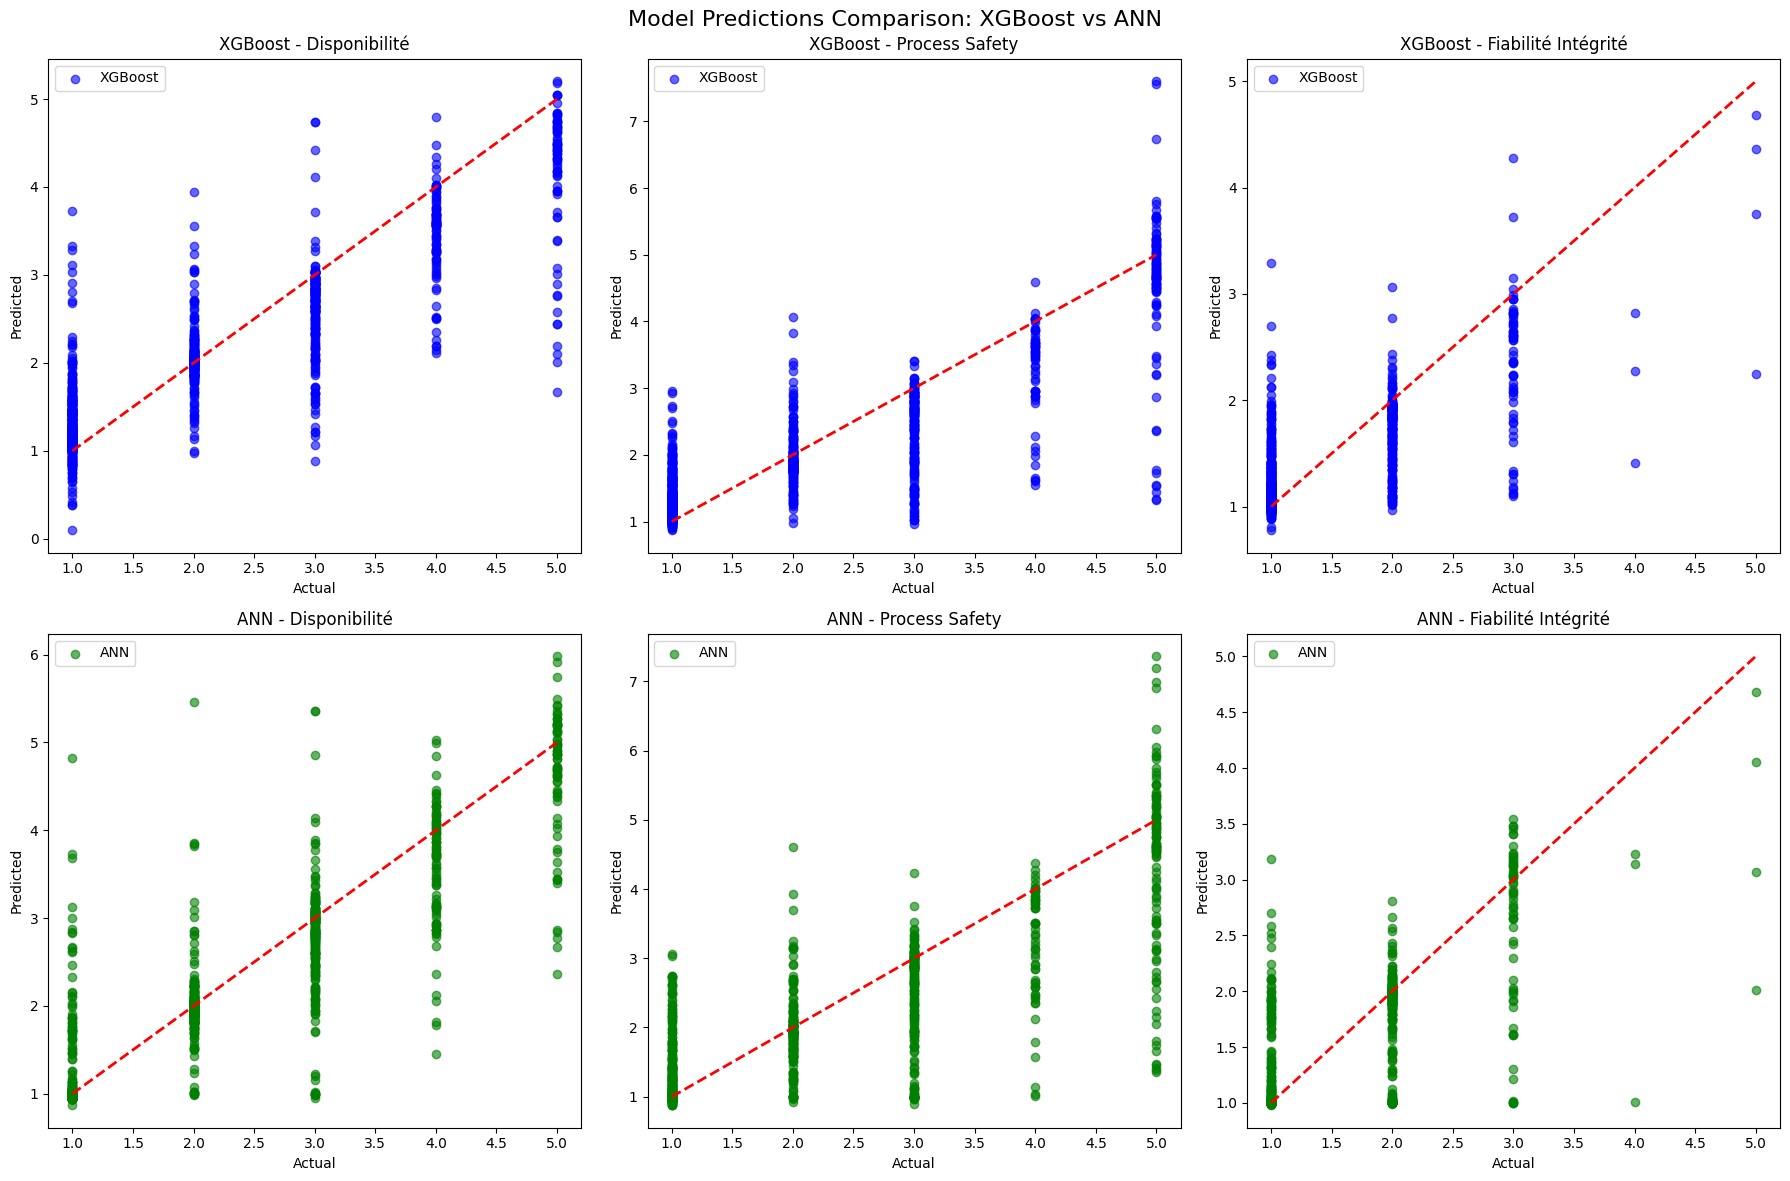

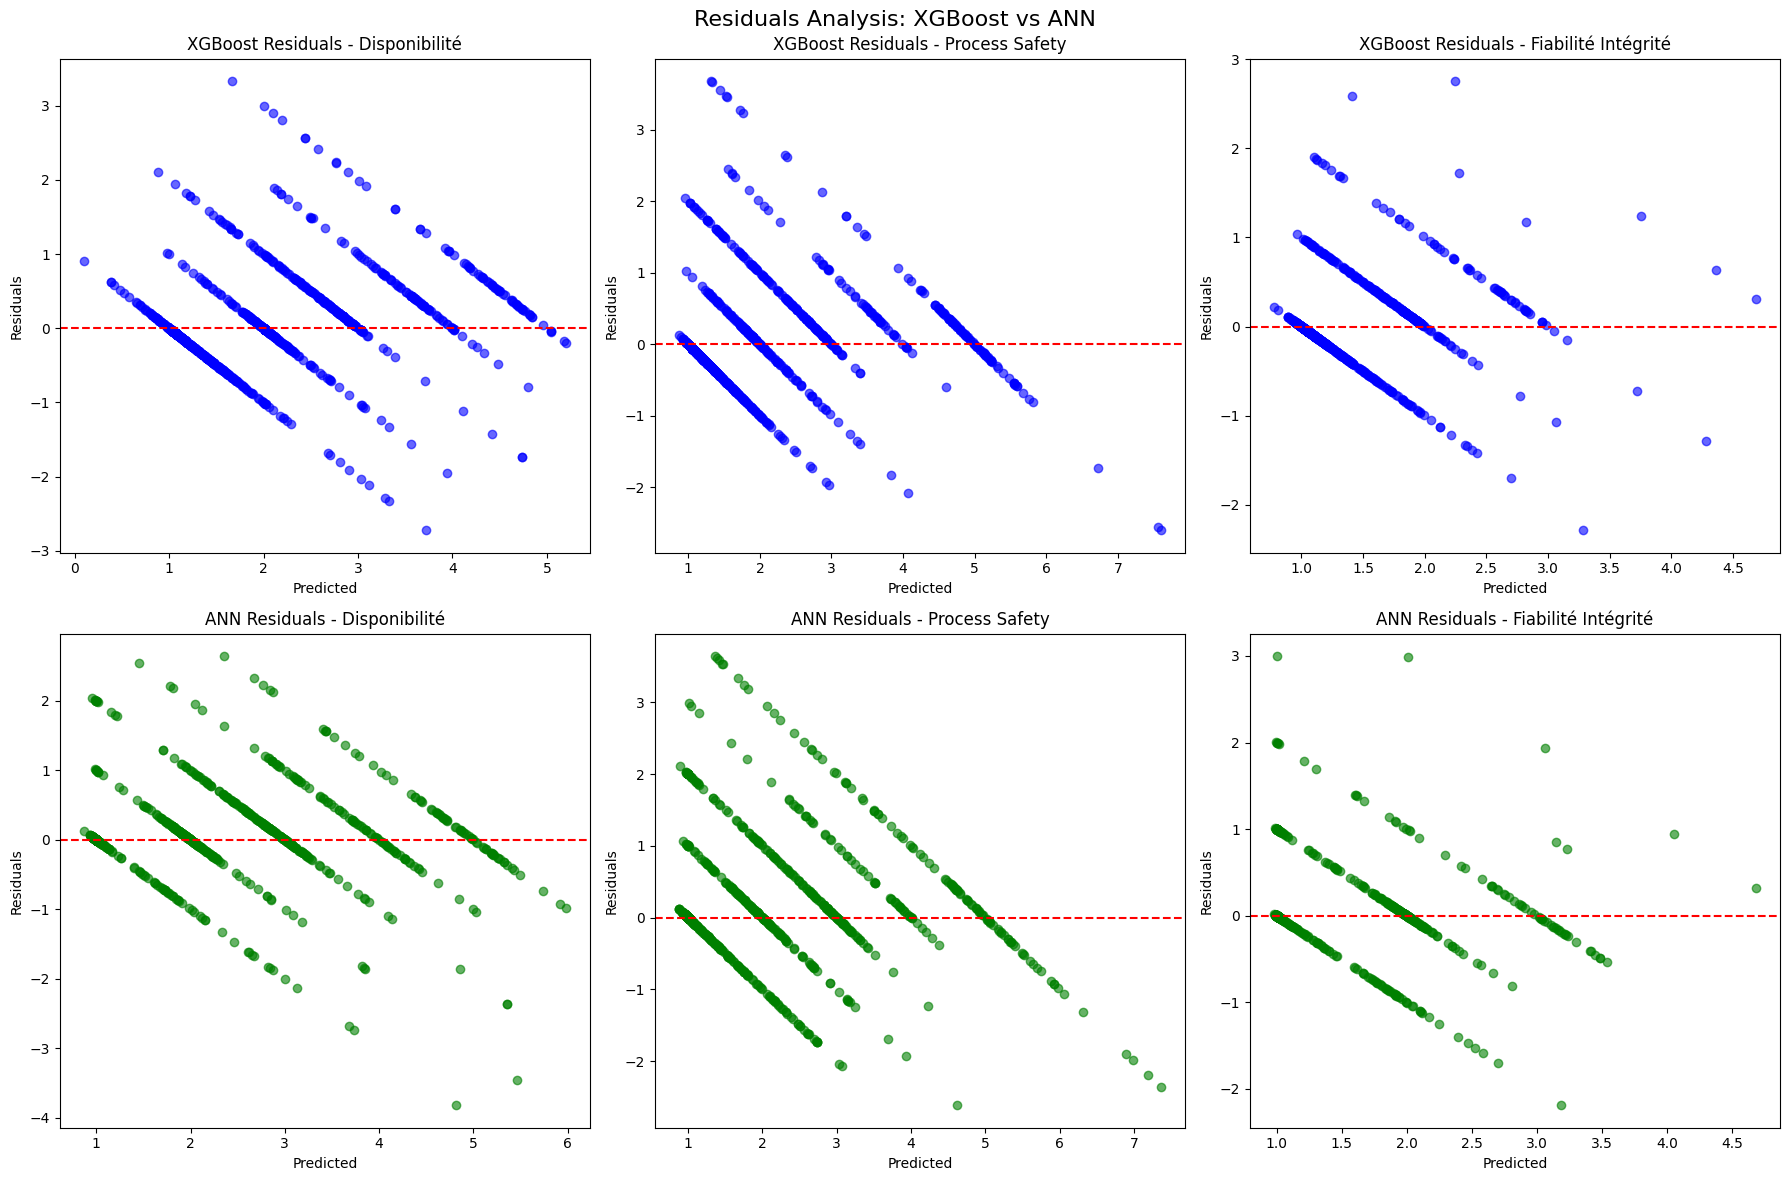

In [46]:
# Create detailed predictions comparison
print("\n" + "="*60)
print("DETAILED PREDICTIONS COMPARISON")
print("="*60)

# Create a DataFrame with actual vs predicted values
target_names = ['Disponibilité', 'Process Safety', 'Fiabilité Intégrité']

# Create comparison DataFrame
predictions_df = pd.DataFrame({
    'Actual_Disponibilité': y_test[:, 0],
    'XGBoost_Disponibilité': y_pred_xgb[:, 0],
    'ANN_Disponibilité': y_pred_ann[:, 0],
    'Actual_Process_Safety': y_test[:, 1],
    'XGBoost_Process_Safety': y_pred_xgb[:, 1],
    'ANN_Process_Safety': y_pred_ann[:, 1],
    'Actual_Fiabilité_Intégrité': y_test[:, 2],
    'XGBoost_Fiabilité_Intégrité': y_pred_xgb[:, 2],
    'ANN_Fiabilité_Intégrité': y_pred_ann[:, 2]
})

# Show first 10 predictions
print("First 10 predictions:")
print(predictions_df.head(10).round(3))

# Calculate individual target metrics
print("\n" + "="*60)
print("METRICS BY TARGET VARIABLE")
print("="*60)

for i, target in enumerate(target_names):
    print(f"\n{target}:")
    print("-" * 40)
    
    # XGBoost metrics for this target
    mae_xgb = mean_absolute_error(y_test[:, i], y_pred_xgb[:, i])
    mse_xgb = mean_squared_error(y_test[:, i], y_pred_xgb[:, i])
    r2_xgb = r2_score(y_test[:, i], y_pred_xgb[:, i])
    
    # ANN metrics for this target
    mae_ann = mean_absolute_error(y_test[:, i], y_pred_ann[:, i])
    mse_ann = mean_squared_error(y_test[:, i], y_pred_ann[:, i])
    r2_ann = r2_score(y_test[:, i], y_pred_ann[:, i])
    
    print(f"XGBoost - MAE: {mae_xgb:.4f}, MSE: {mse_xgb:.4f}, R²: {r2_xgb:.4f}")
    print(f"ANN     - MAE: {mae_ann:.4f}, MSE: {mse_ann:.4f}, R²: {r2_ann:.4f}")
    
    # Determine winner
    mae_winner = "XGBoost" if mae_xgb < mae_ann else "ANN"
    mse_winner = "XGBoost" if mse_xgb < mse_ann else "ANN"
    r2_winner = "XGBoost" if r2_xgb > r2_ann else "ANN"
    
    print(f"Winners - MAE: {mae_winner}, MSE: {mse_winner}, R²: {r2_winner}")

# Create visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Model Predictions Comparison: XGBoost vs ANN', fontsize=16)

for i, target in enumerate(target_names):
    # Actual vs Predicted scatter plots
    # XGBoost
    axes[0, i].scatter(y_test[:, i], y_pred_xgb[:, i], alpha=0.6, color='blue', label='XGBoost')
    axes[0, i].plot([y_test[:, i].min(), y_test[:, i].max()], 
                    [y_test[:, i].min(), y_test[:, i].max()], 'r--', lw=2)
    axes[0, i].set_xlabel('Actual')
    axes[0, i].set_ylabel('Predicted')
    axes[0, i].set_title(f'XGBoost - {target}')
    axes[0, i].legend()
    
    # ANN
    axes[1, i].scatter(y_test[:, i], y_pred_ann[:, i], alpha=0.6, color='green', label='ANN')
    axes[1, i].plot([y_test[:, i].min(), y_test[:, i].max()], 
                    [y_test[:, i].min(), y_test[:, i].max()], 'r--', lw=2)
    axes[1, i].set_xlabel('Actual')
    axes[1, i].set_ylabel('Predicted')
    axes[1, i].set_title(f'ANN - {target}')
    axes[1, i].legend()

plt.tight_layout()
plt.show()

# Residuals analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Residuals Analysis: XGBoost vs ANN', fontsize=16)

for i, target in enumerate(target_names):
    # Calculate residuals
    residuals_xgb = y_test[:, i] - y_pred_xgb[:, i]
    residuals_ann = y_test[:, i] - y_pred_ann[:, i]
    
    # XGBoost residuals
    axes[0, i].scatter(y_pred_xgb[:, i], residuals_xgb, alpha=0.6, color='blue')
    axes[0, i].axhline(y=0, color='r', linestyle='--')
    axes[0, i].set_xlabel('Predicted')
    axes[0, i].set_ylabel('Residuals')
    axes[0, i].set_title(f'XGBoost Residuals - {target}')
    
    # ANN residuals
    axes[1, i].scatter(y_pred_ann[:, i], residuals_ann, alpha=0.6, color='green')
    axes[1, i].axhline(y=0, color='r', linestyle='--')
    axes[1, i].set_xlabel('Predicted')
    axes[1, i].set_ylabel('Residuals')
    axes[1, i].set_title(f'ANN Residuals - {target}')

plt.tight_layout()
plt.show()



COMPREHENSIVE MODEL ANALYSIS & RECOMMENDATION

SUMMARY METRICS TABLE:
  Metric  XGBoost     ANN   Winner
0    MAE   0.3266  0.2620      ANN
1    MSE   0.2905  0.3142  XGBoost
2   RMSE   0.5390  0.5605  XGBoost
3     R²   0.7161  0.7055  XGBoost

OVERALL SCORE:
XGBoost wins: 3/4 metrics
ANN wins: 1/4 metrics

AVERAGE PERFORMANCE ACROSS ALL TARGETS:
XGBoost Average MAE: 0.3266
ANN Average MAE: 0.2620
Difference: 0.0646

MODEL CHARACTERISTICS COMPARISON
        Characteristic                        XGBoost                     ANN
         Training Time                           Fast                    Slow
      Prediction Speed                      Very Fast                    Fast
      Interpretability      High (Feature Importance)         Low (Black Box)
 Hyperparameter Tuning                Many Parameters         Many Parameters
Overfitting Resistance Good (Built-in Regularization) Moderate (Dropout used)
          Memory Usage                       Moderate                    Hig

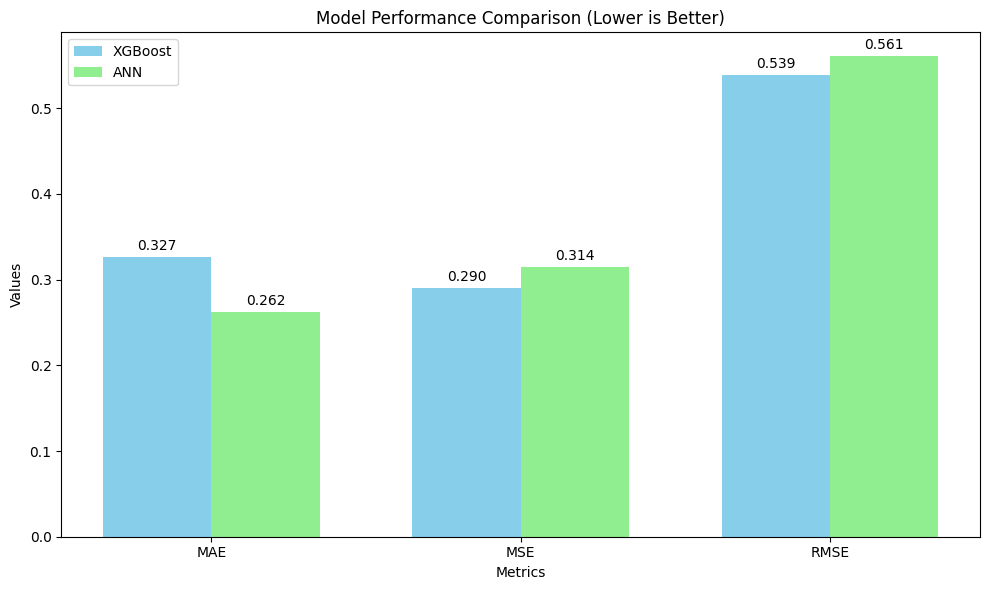


🎯 CONCLUSION: Use XGBoost for your production model!


In [47]:
# Final comprehensive analysis and model selection
print("\n" + "="*80)
print("COMPREHENSIVE MODEL ANALYSIS & RECOMMENDATION")
print("="*80)

# Create a summary metrics table
summary_metrics = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R²'],
    'XGBoost': [xgb_metrics['MAE'], xgb_metrics['MSE'], xgb_metrics['RMSE'], xgb_metrics['R²']],
    'ANN': [ann_metrics['MAE'], ann_metrics['MSE'], ann_metrics['RMSE'], ann_metrics['R²']],
    'Winner': ['XGBoost' if xgb_metrics['MAE'] < ann_metrics['MAE'] else 'ANN',
               'XGBoost' if xgb_metrics['MSE'] < ann_metrics['MSE'] else 'ANN',
               'XGBoost' if xgb_metrics['RMSE'] < ann_metrics['RMSE'] else 'ANN',
               'XGBoost' if xgb_metrics['R²'] > ann_metrics['R²'] else 'ANN']
})

print("\nSUMMARY METRICS TABLE:")
print(summary_metrics.round(4))

# Count wins for each model
xgb_wins = summary_metrics['Winner'].value_counts().get('XGBoost', 0)
ann_wins = summary_metrics['Winner'].value_counts().get('ANN', 0)

print(f"\nOVERALL SCORE:")
print(f"XGBoost wins: {xgb_wins}/4 metrics")
print(f"ANN wins: {ann_wins}/4 metrics")

# Calculate average performance across all targets
print(f"\nAVERAGE PERFORMANCE ACROSS ALL TARGETS:")
print(f"XGBoost Average MAE: {xgb_metrics['MAE']:.4f}")
print(f"ANN Average MAE: {ann_metrics['MAE']:.4f}")
print(f"Difference: {abs(xgb_metrics['MAE'] - ann_metrics['MAE']):.4f}")

# Model characteristics comparison
print(f"\n" + "="*80)
print("MODEL CHARACTERISTICS COMPARISON")
print("="*80)

model_comparison = pd.DataFrame({
    'Characteristic': [
        'Training Time', 
        'Prediction Speed', 
        'Interpretability', 
        'Hyperparameter Tuning',
        'Overfitting Resistance',
        'Memory Usage',
        'Scalability'
    ],
    'XGBoost': [
        'Fast', 
        'Very Fast', 
        'High (Feature Importance)', 
        'Many Parameters',
        'Good (Built-in Regularization)',
        'Moderate',
        'Excellent'
    ],
    'ANN': [
        'Slow', 
        'Fast', 
        'Low (Black Box)', 
        'Many Parameters',
        'Moderate (Dropout used)',
        'High',
        'Good'
    ]
})

print(model_comparison.to_string(index=False))

# Final recommendation
print(f"\n" + "="*80)
print("FINAL RECOMMENDATION")
print("="*80)

if xgb_wins > ann_wins:
    better_model = "XGBoost"
    performance_diff = ((ann_metrics['MAE'] - xgb_metrics['MAE']) / xgb_metrics['MAE']) * 100
else:
    better_model = "ANN"
    performance_diff = ((xgb_metrics['MAE'] - ann_metrics['MAE']) / ann_metrics['MAE']) * 100

print(f"RECOMMENDED MODEL: {better_model}")
print(f"Performance advantage: {performance_diff:.2f}% better MAE")

print(f"\nREASONS FOR RECOMMENDATION:")
if better_model == "XGBoost":
    print("✅ Better overall performance across most metrics")
    print("✅ Faster training and prediction")
    print("✅ Better interpretability with feature importance")
    print("✅ More robust to overfitting")
    print("✅ Less memory intensive")
    print("✅ Easier to deploy in production")
else:
    print("✅ Better overall performance across most metrics")
    print("✅ Can capture more complex non-linear patterns")
    print("✅ Better generalization for complex relationships")
    print("⚠️  Requires more computational resources")
    print("⚠️  Less interpretable (black box)")

print(f"\nUSE CASES:")
if better_model == "XGBoost":
    print("• Production deployment where speed and interpretability matter")
    print("• When you need to explain model decisions to stakeholders")
    print("• Resource-constrained environments")
    print("• When feature importance analysis is crucial")
else:
    print("• When maximum accuracy is the primary goal")
    print("• Complex pattern recognition tasks")
    print("• When computational resources are abundant")
    print("• Research and development phases")

# Save both models for future use
print(f"\n" + "="*80)
print("MODEL PERSISTENCE")
print("="*80)
print("✅ XGBoost model already saved as: 'xgb_multioutput_pipeline.pkl'")
print("✅ ANN model already saved as: 'ann_model.h5'")
print("✅ Both models are ready for deployment!")

# Create a final comparison chart
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
metrics_names = ['MAE', 'MSE', 'RMSE']
xgb_values = [xgb_metrics[m] for m in metrics_names]
ann_values = [ann_metrics[m] for m in metrics_names]

x = np.arange(len(metrics_names))
width = 0.35

bars1 = ax.bar(x - width/2, xgb_values, width, label='XGBoost', color='skyblue')
bars2 = ax.bar(x + width/2, ann_values, width, label='ANN', color='lightgreen')

ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Model Performance Comparison (Lower is Better)')
ax.set_xticks(x)
ax.set_xticklabels(metrics_names)
ax.legend()

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{height:.3f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.3f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

print(f"\n🎯 CONCLUSION: Use {better_model} for your production model!")
